# Исследование объявлений о продаже квартир

  
#### `Задача:`  Провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов.  
  
#### `Цель:`  Построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности.   
  
#### `Данные:`  В распоряжении данные сервиса недвижимости.  
  
Архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.  
  
По каждой квартире на продажу доступны два вида данных:  
- первые вписаны пользователем  
- вторые получены автоматически на основе картографических данных  
(расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов, количество парков и водоёмов также заполняется без участия пользователя)  

  ##### `Описание данных:`  
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)   
`balcony` — число балконов  
`ceiling_height` — высота потолков (м)  
`cityCenters_nearest` — расстояние до центра города (м)  
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
`first_day_exposition` — дата публикации  
`floor` — этаж  
`floors_total` — всего этажей в доме  
`is_apartment` — апартаменты (булев тип)  
`kitchen_area` — площадь кухни в квадратных метрах (м²)  
`last_price` — цена на момент снятия с публикации  
`living_area` — жилая площадь в квадратных метрах (м²)  
`locality_name` — название населённого пункта  
`open_plan` — свободная планировка (булев тип)  
`parks_around3000` — число парков в радиусе 3 км  
`parks_nearest` — расстояние до ближайшего парка (м)  
`ponds_around3000` — число водоёмов в радиусе 3 км  
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`rooms` — число комнат  
`studio` — квартира-студия (булев тип)  
`total_area` — общая площадь квартиры в квадратных метрах (м²)  
`total_images` — число фотографий квартиры в объявлении   
 
#### `Требования к исследованию:`

Научиться определять рыночную стоимость объектов недвижимости.

Установить параметры. Изучить перечисленные ниже параметры объектов и построить отдельные гистограммы для каждого из них.  
Список параметров:  
- общая площадь  
- жилая площадь  
- площадь кухни  
- цена объекта  
- количество комнат  
- высота потолков  
- тип этажа квартиры («первый», «последний», «другой»)  
- общее количество этажей в доме  
- расстояние до центра города в метрах  
- расстояние до ближайшего парка  
  
Изучить, как быстро продавались квартиры
  
Выявить факторы, влияющие на общую (полную) стоимость объекта. Изучить зависимость цены от:
  
- общей площади  
- жилой площади  
- площади кухни  
- количества комнат  
- этажа, на котором расположена квартира (первый, последний, другой)  
- даты размещения (день недели, месяц, год)  
  
Использовать визуализацию.


## Часть 1. Изучение общей информации

### Загрузка данных

In [416]:
# загрузка библиотек
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime, timedelta

# не показывать предупреждения
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings('ignore')

In [417]:
# загрузка датасета
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t') 
sns.set()  

### Изучение данных

In [418]:
# видеть все колонки
pd.options.display.max_columns = 100  

In [419]:
# функция для изучения данных
def df_analysis(df):
    print('_________________________________________________________________________________________________________')
    print(' ')
    print('Вывод 2 строк таблицы с начала и с конца с заголовками')
    display(data.head(2), data.tail(2))
    print('_________________________________________________________________________________________________________')
    print(' ')
    print('Запрос всех атрибутов')
    print(' ')
    print(data.info())
    print('_________________________________________________________________________________________________________')    
    print(' ')
    print('Числовое описание данных')
    print(' ')
    print(data.describe().T.round(1))
    print('_________________________________________________________________________________________________________') 
    print(' ')
    print('Пропущенные значения')
    print(' ')
    data_pass = pd.DataFrame(data.isna().sum().sort_values(ascending=False))
    data_pass.columns = ['pass']
    data_pass['perc, %'] = (data_pass['pass']/len(data)*100).round(1) 
    print(data_pass) 
    print('_________________________________________________________________________________________________________')
    print(' ')
    print('Количество явных дубликатов')
    print(' ')
    print(data.duplicated().sum())
    print('_________________________________________________________________________________________________________')
    print(' ')
    print('Общая обзорная гистограмма для столбцов с числовыми данными')
    print(' ')
    data.hist(figsize=(15, 20))
    plt.show()
    print('_________________________________________________________________________________________________________')

_________________________________________________________________________________________________________
 
Вывод 2 строк таблицы с начала и с конца с заголовками


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.3,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.0,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


_________________________________________________________________________________________________________
 
Запрос всех атрибутов
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  fl

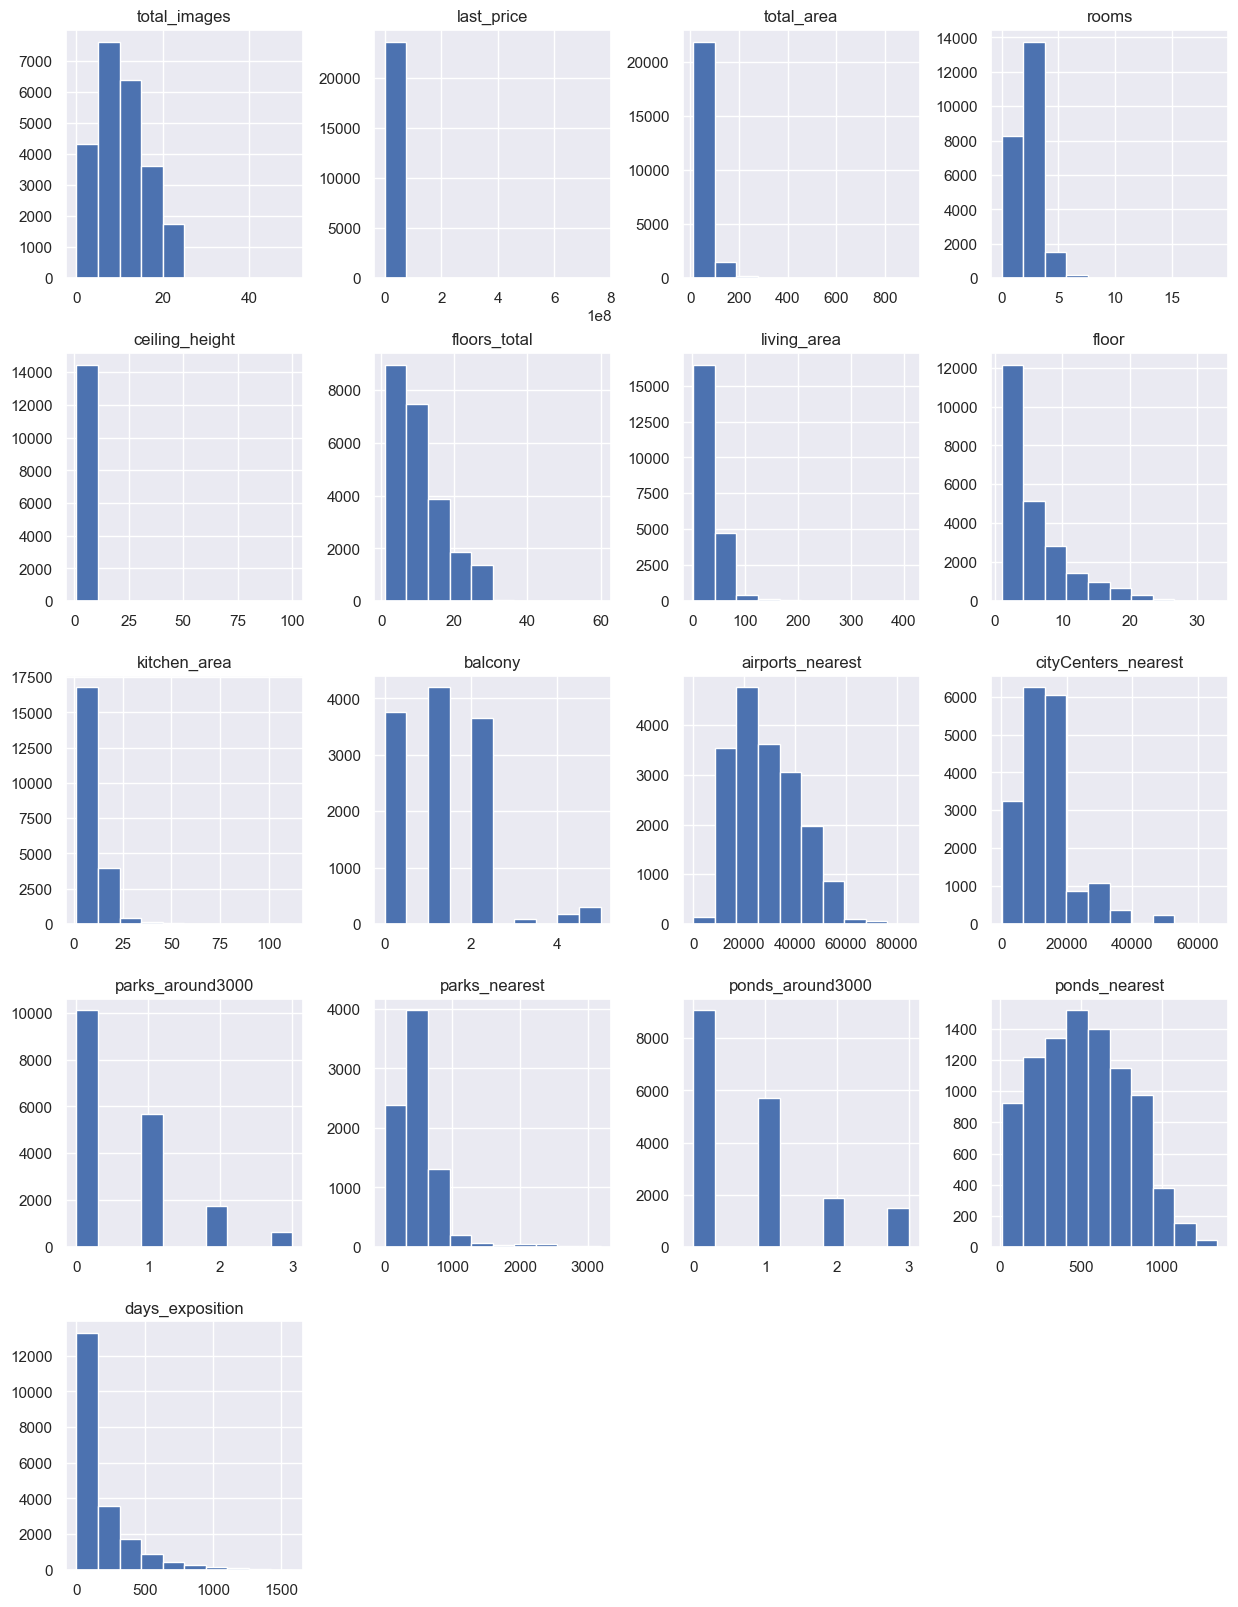

_________________________________________________________________________________________________________


In [420]:
df_analysis(data)

### Вывод по data:

- в датафрейме 23 699 строк    
- названия заголовков привести к нижнему регистру и единообразию    
- явных дубликатов не выявлено     
- преобразовать форматы данных дат  
- пропущенные значения в столбцах:   
     - **is_apartment** - 88%  
     - **parks_nearest** - 66%    
     - **ponds_nearest** - 62%    
     - **balcony** - 49%    
     - **ceiling_height** - 39%    
     - **airports_nearest** - 23%    
     - **cityCenters_nearest** - 23%    
     - **ponds_around3000** - 23%    
     - **parks_around3000** - 23%    
     - **days_exposition** - 13%    
     - **kitchen_area** - 10%    
     - **living_area** - 8%    
     - **floors_total** - 0.4%    
     - **locality_name** - 0.2%  
- исследовать выбросы в числовых параметрах (соответственно данных в гистограммах)   
- добавить новые столбцы по заданию   

## Часть 2. Подготовка данных

### Предобработка данных 

In [421]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True) # приведение заголовка к единообразию

In [422]:
# преобразование формата даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')  
data.head(3)
#pd.options.display.float_format = '{:,.1f}'.format   # формат кол-во знаков после запятой

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


#### Добавление в таблицу новых столбцов

In [423]:
# цена одного квадратного метра
data['price_m2'] = data['last_price']/data['total_area']
# день публикации объявления (0 - понедельник, 1 - вторник и т.д.) first_day_exposition
data['day_ad_N'] = data['first_day_exposition'].dt.day_of_week
data['day_ad'] = data['first_day_exposition'].dt.day_name()
# месяц публикации объявления
data['month_ad'] = data['first_day_exposition'].dt.month
# год публикации объявления
data['year_ad'] = data['first_day_exposition'].dt.year
# тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor, axis=1)
# расстояние в км до центра города
data['km_to_center'] = round(data['city_centers_nearest'] / 1000, 0)

#### Изучение пропущенных значений в столбцах 

In [424]:
data_pass = pd.DataFrame(data.isna().sum().sort_values(ascending=False)) # количество пропущенных значений, преобразование в DF
data_pass.columns = ['pass'] # название столбца с пропусками
data_pass['perc, %'] = (data_pass['pass']/len(data)*100).round(1) # процент пропусков в столбцах датафрейма
data_pass

,pass,"perc, %"
is_apartment,20924,88.3
parks_nearest,15620,65.9
ponds_nearest,14589,61.6
balcony,11519,48.6
ceiling_height,9195,38.8
airports_nearest,5542,23.4
km_to_center,5519,23.3
city_centers_nearest,5519,23.3
ponds_around3000,5518,23.3
parks_around3000,5518,23.3


#### Описание пропущенных значений и работа с ними 

**is_apartment** — апартаменты (булев тип) - 88.3% - заменены значением False  
**parks_nearest** — расстояние до ближайшего парка (м) - 65.9% - заменены значением 0  
**ponds_nearest** — расстояние до ближайшего водоёма (м) - 61.6% - не участвует в анализе  
**balcony** — число балконов - 48.6% - заменены значением 0  
**ceiling_height** — высота потолков (м) - 38.8% - на медианное значение по этажности дома  
**airports_nearest** — расст. до ближайшего аэропорта в метрах (м) - 23.4% - на медианное знач. по локации, оставшиеся пропущ.значения (5394 строк) заменены на 0  
**km_to_center** — расстояние в км до центра города - 23.3% - на медианное знач. по локации, оставшиеся пропущ.значения (5394 строк) заменены на 0       
**city_centers_nearest** — расстояние до центра города (м) - 23.3% - не участвует в анализе  
**ponds_around3000** — число водоёмов в радиусе 3 км - 23.3% - не участвует в анализе  
**parks_around3000** — число парков в радиусе 3 км - 23.3% - не участвует в анализе  
**days_exposition** — дней размещения объявления (от публ. до снят.) - 13.4% - если нет значения, значит не снято с публикации    
**kitchen_area** — площадь кухни в квадратных метрах (м²) - 9.6% - на медианный % от площади квартиры по локации, т.к. в датафрейме присутствуют данные и по малым регионам (деревни, сёла). Оставшиеся пропуски заменены значением % площади кухни от медианной общей жилой площади (данные всего датафрейма)  
**living_area** — жилая площадь в квадратных метрах (м²) - 8.0% - заменены медианным знач. комнатности квартиры  
**floors_total** — всего этажей в доме - 0.4% - заменены значением 0, удалены строки с этажами выше 30 (15 строк)  
**locality_name** — название населённого пункта - 0.2% - удалены, т.к. составляют незначительную часть данных  

In [425]:
# избавление от пропущенных значений на False, т.к.пропуск означает НЕ апартаменты
data['is_apartment'] = data['is_apartment'].fillna(False)  
display(sorted(set(data['is_apartment'].unique())))

[False, True]

In [426]:
# заполнение нулями тех параметров, для которых это допустимо
data['parks_nearest'] = data['parks_nearest'].fillna(0)  #  избавление от пропущенных значений на 0 до ближ.парка
data['balcony'] = data['balcony'].fillna(0)  #  избавление от пропущенных значений на 0 в кол-ве балконов
data['floors_total'] = data['floors_total'].fillna(0)  #  избавление от пропущенных значений на 0 в этажности дома

In [427]:
# свод этажности и h потолков
floor_median = pd.pivot_table(data, index='floors_total', values='ceiling_height', aggfunc=['median', 'count']) 
floor_median.columns = ['median', 'count']
#display(floor_median)
for floor in floor_median.index: # замена пропущенных значений на медианное значение по этажности дома
    data.loc[(data['ceiling_height'].isna()) & 
             (data['floors_total'] == floor), 
             'ceiling_height'] = floor_median.loc[floor, 'median']
data['ceiling_height'] = data['ceiling_height'].fillna(2.6)   # замена оставшихся значений на 2,6 м    
display(data['ceiling_height'].isna().sum())
#floor_median_1 = pd.pivot_table(data, index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
#display(floor_median_1)

0

In [428]:
 # свод локации и расстояния до аэропорта
km_to_air_median = pd.pivot_table(data, index='locality_name', values='airports_nearest', aggfunc=['median', 'count'])
km_to_air_median.columns = ['median', 'count']
#display(total_km_to_center)
for kmm in km_to_air_median.index: 
    data.loc[(data['airports_nearest'].isna()) & 
             (data['locality_name'] == kmm), 
             'airports_nearest'] = km_to_air_median.loc[kmm, 'median']
data['airports_nearest'] = data['airports_nearest'].fillna(0)  # замена оставшихся значений на 0   
display(data['airports_nearest'].isna().sum())

0

In [429]:
# параметры удаленности можно в целом оставить как есть, а можно обработать, заполнив нулями
km_to_center_median = pd.pivot_table(data, index='locality_name', values='km_to_center', aggfunc=['median', 'count'])
km_to_center_median.columns = ['median', 'count']
#display(total_km_to_center)
for km in km_to_center_median.index: 
    data.loc[(data['km_to_center'].isna()) & 
             (data['locality_name'] == km), 
             'km_to_center'] = km_to_center_median.loc[km, 'median']
data['km_to_center'] = data['km_to_center'].fillna(0)  # замена оставшихся значений на 0     
display(data['km_to_center'].isna().sum())

0

In [430]:
# свод локации и S кухни
kitchen_m2_median = pd.pivot_table(data, index='locality_name', values='kitchen_area', aggfunc=['median', 'count']) 
kitchen_m2_median.columns = ['median', 'count']
display(kitchen_m2_median)

,median,count
locality_name,,
Бокситогорск,6.0,11
Волосово,8.3,35
Волхов,6.8,97
Всеволожск,10.0,357
Выборг,8.0,201
...,...,...
поселок станции Корнево,NaN,0
поселок станции Лужайка,NaN,0
посёлок Левашово,NaN,0


In [431]:
for m2 in kitchen_m2_median.index: # замена пропущенных значений медианным значением по локации
    data.loc[(data['kitchen_area'].isna()) & 
             (data['locality_name'] == m2), 
             'kitchen_area'] = kitchen_m2_median.loc[m2, 'median']
a = (data['kitchen_area']/data['total_area']*100).median() # % S кухни от всей площади
b = (data['total_area'].median())*a/100  # средняя площадь кухни всей выборки датафрейма
data['kitchen_area'] = data['kitchen_area'].fillna(b) # замена пропущенных значений % кухни от всей площади
display(data['kitchen_area'].isna().sum())
#total_kitchen_m2_1 = pd.pivot_table(data, index='locality_name', values='kitchen_area', aggfunc=['median', 'count']) 
#display(total_kitchen_m2_1)

0

In [432]:
# свод комнатности и жилой S
flat_median = pd.pivot_table(data, index='rooms', values='living_area', aggfunc=['median', 'count']) 
flat_median.columns = ['median', 'count']
flat_median

,median,count
rooms,,
0,18.000,183
1,17.600,7388
2,30.500,7296
3,45.000,5366
4,63.600,1089
5,91.785,292
6,123.900,99
7,145.000,53
8,161.000,12


In [433]:
#data.loc[(data['living_area'].isna()) & (data['rooms'] == room), 'living_area'] = flat_median.loc[room, 'median']

for room in flat_median.index: # замена пропущенных значений медианным значением по комнатности
    data.loc[(data['living_area'].isna()) & 
             (data['rooms'] == room), 
             'living_area'] = flat_median.loc[room, 'median']
display(data['living_area'].isna().sum())

0

#### Обработка дубликатов, в т.ч. неявных

In [434]:
display(len(data['locality_name'].unique())) # кол-во уникальных значений до удаления дубликатов

365

In [435]:
# работа с неявными дубликатами - замена названий нас.пунктов и приведение к единообразию
data.locality_name = data.locality_name.str.replace('ё', 'е')
data.locality_name = data.locality_name.str.replace('городской поселок', 'поселок')
data.locality_name = data.locality_name.str.replace('коттеджный поселок', 'поселок')
data.locality_name = data.locality_name.str.replace('поселок городского типа', 'поселок')
data.locality_name = data.locality_name.str.replace('поселок при железнодорожной станции', 'поселок')
data.locality_name = data.locality_name.str.replace('поселок станции', 'поселок')
data.locality_name = data.locality_name.str.replace('садоводческое некоммерческое товарищество', 'СНТ')
data.locality_name = data.locality_name.str.replace('садовое товарищество', 'СНТ')

In [436]:
# пропуски в населенных пунктах можно отбросить
data.dropna(subset=['locality_name']) 
display(len(data['locality_name'].unique())) # кол-во уникальных значений после удаления дубликатов

319

#### Изменение типов данных

Формат даты 'first_day_exposition' для удобства работы с параметром.  
Цена 'last_price' проще воспринимается в целочисленном формате.  
Аналогично этажность дома 'floors_total', цена за м2 'price_m2' и количество балконов 'balcony' приведены к формату 'int'.

In [437]:
# замена некоторых типов данных
data['last_price'] = data['last_price'].astype('int') # формат последней цены
data['floors_total'] = data['floors_total'].astype('int') # этажность дома в целочисл.формате
data['balcony'] = data['balcony'].astype('int') # кол-во балконов в целочисл.формате
data['price_m2'] = data['price_m2'].astype('int') # цена за м2 в целочисл.формате
#data['days_exposition'] = data['days_exposition'].astype('int') # срок размещ. объявл.(от публ. до снятия) в дн в целочисл.формате

#### Обработка аномальных значений

In [438]:
data.describe() # обработанный итоговый датафрейм, описание числовых данных

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day_ad_N,month_ad,year_ad,km_to_center
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,18180.000000,18181.000000,23699.000000,18181.000000,9110.000000,20518.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.736135,10.635090,34.321982,5.892358,10.467377,0.591080,22294.459766,14191.277833,0.611408,167.315499,0.770255,517.980900,180.888634,9.942121e+04,2.569307,6.400101,2017.367146,10.986961
std,5.682529,1.088701e+07,35.654083,1.078405,0.994270,6.616396,21.700627,4.885249,5.635050,0.959298,16447.887584,8608.386210,0.802074,306.709997,0.938346,277.720643,219.727988,5.030681e+04,1.789082,3.491561,1.039771,9.651460
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,0.000000,0.000000,13.000000,1.000000,1.110000e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.400000,2.000000,7.200000,0.000000,10638.000000,9238.000000,0.000000,0.000000,0.000000,294.000000,45.000000,7.658500e+04,1.000000,3.000000,2017.000000,2.500000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,9.600000,0.000000,22041.000000,13098.500000,0.000000,0.000000,1.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,11.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.750000,16.000000,42.700000,8.000000,11.470000,1.000000,34496.500000,16293.000000,1.000000,301.000000,1.000000,729.000000,232.000000,1.142560e+05,4.000000,10.000000,2018.000000,15.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


**Параметры для исследования**  
Первое впечатление о каждом столбце можно получить из гистограмм 1 блока с изучением информации.  
Более подробно вникнуть в данные помогают графики "диаграммы размаха(ящик с усами)" и "гистограммы". Сначала исследуются данные по max и min границам  значений, далее выбираются ограничения, пределы которых будем считать необходимыми и достаточными для анализа. При условии, что количество аномальных значений ничтожно и никак не влияет на общий итоговый результат, можно просто удалить строки, а не подгонять значения под реальные.  
Необходимо исключение из анализа строк с явными аномалиями, единичные случаи, которые не принципиальны для общего результата, или которые демонстрируют очевидные ошибки :  
- **ceiling_height** max 100 м  min 1 м. - удалено < 2.5 м и > 5 м.  
- **price_m2** max 1 907 500 руб. - удалено < 10 000 руб за м2 и > 250 000 руб за м2.  
- **total_area** max 900 м min 1 м. - удалено < 17 м и > 500 м.  
- **living_area** max 410 м min 2 м. - удалено < 12 м и > 251 м.  
- **total_area** max 112 м min 1.3 м. - удалено < 3 м и > 70 м.  
- **rooms** max 19 шт. min 0 шт. - удалено > 9 шт.

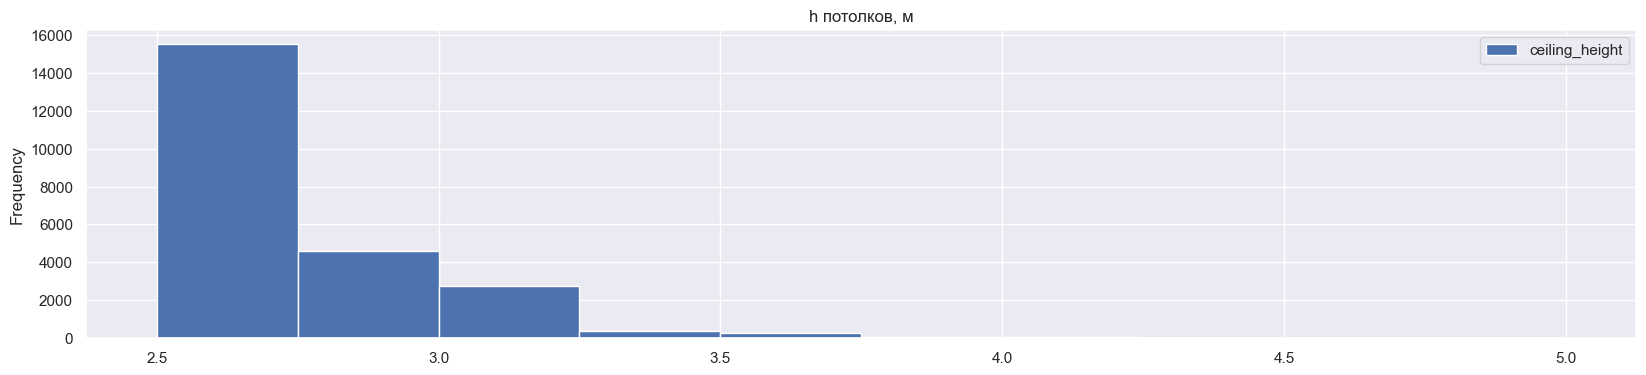

In [439]:
data.plot(kind='hist', title='h потолков, м', y='ceiling_height', bins=10, range=(2.5,5), grid=True, figsize=(20,4))
plt.show()

22869    100.0
22336     32.0
3148      32.0
21377     27.5
5807      27.0
20478     27.0
17857     27.0
4876      27.0
21824     27.0
10773     27.0
Name: ceiling_height, dtype: float64

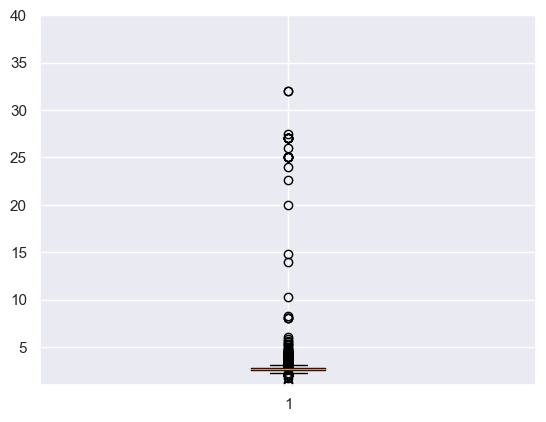

In [440]:
plt.boxplot(data['ceiling_height'])
plt.ylim(1,40)
display(data['ceiling_height'].sort_values(ascending=False).head(10))

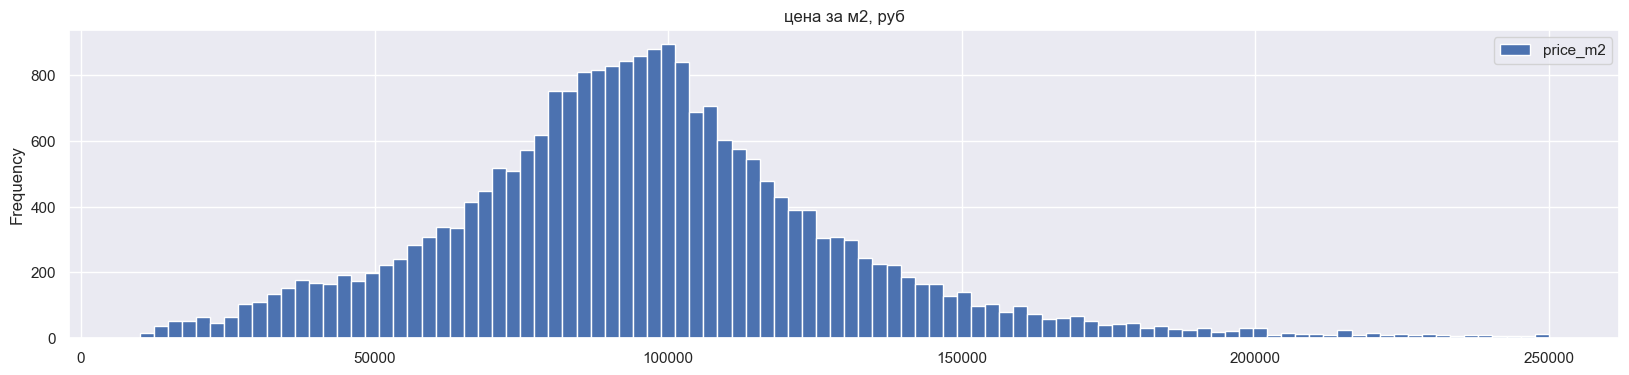

In [441]:
data.plot(kind='hist', title='цена за м2, руб', y='price_m2', bins=100, range=(10000,250000), grid=True, figsize=(20,4))
plt.show()

12971    1907500
1436     1736842
22831    1542604
14706    1000748
4996      995983
16461     857542
4859      848484
17172     848484
16647     841379
17912     813253
Name: price_m2, dtype: int32

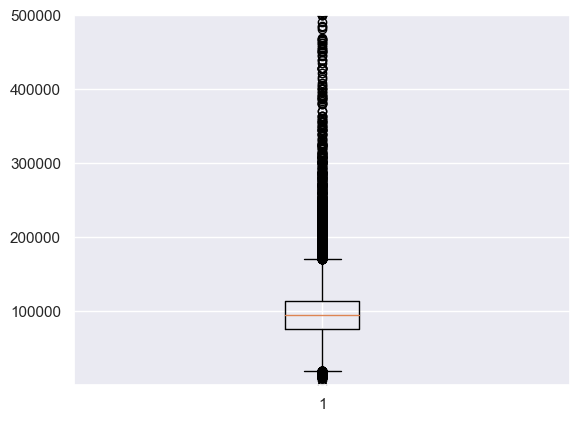

In [442]:
plt.boxplot(data['price_m2'])
plt.ylim(1000,500000)
display(data['price_m2'].sort_values(ascending=False).head(10))

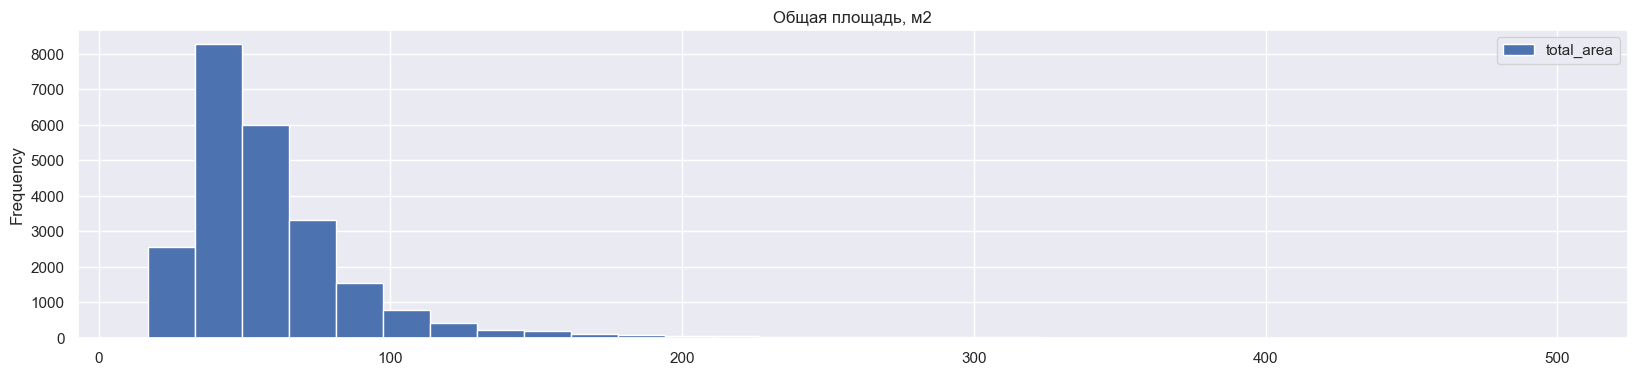

In [443]:
data.plot(kind='hist', title='Общая площадь, м2', y='total_area', bins=30, range=(17,500), grid=True, figsize=(20,4))
plt.show()

19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
5893     500.0
15016    500.0
12401    495.0
Name: total_area, dtype: float64

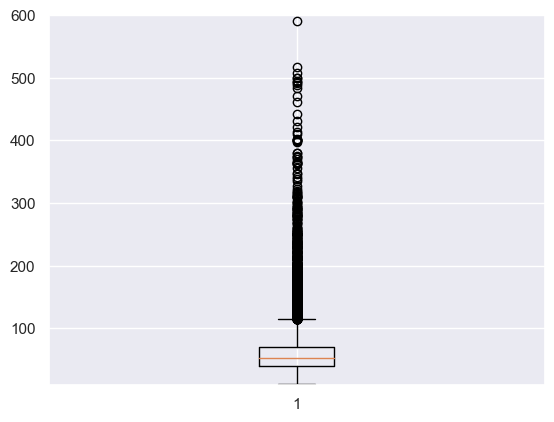

In [444]:
plt.boxplot(data['total_area'])
plt.ylim(10,600)
display(data['total_area'].sort_values(ascending=False).head(10))

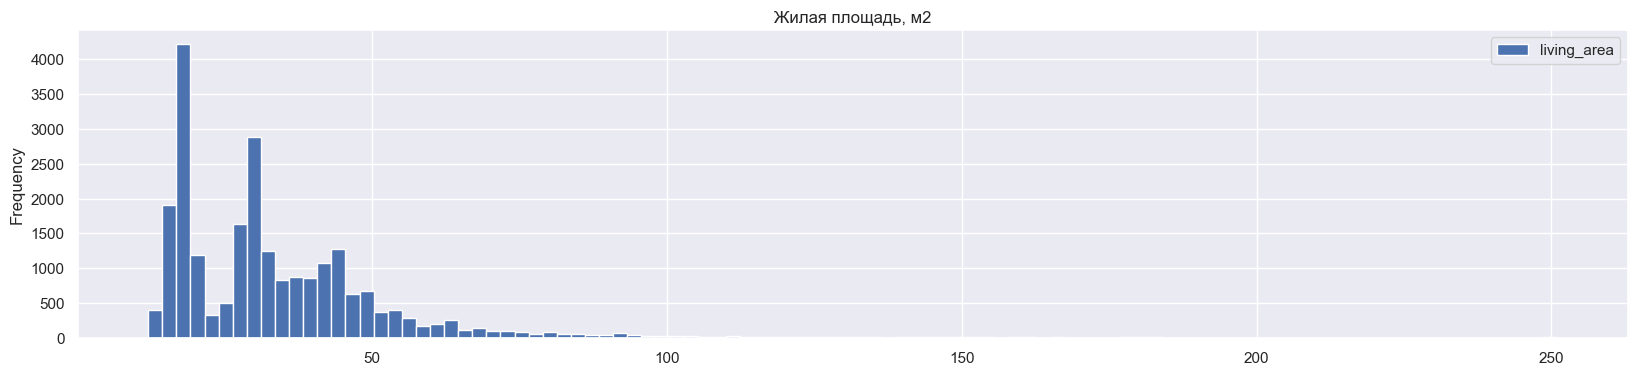

In [445]:
data.plot(kind='hist', title='Жилая площадь, м2', y='living_area', bins=100, range=(12,251), grid=True, figsize=(20,4))
plt.show()

19540    409.7
5358     409.0
12401    347.5
4237     332.0
12859    322.3
660      312.5
8018     301.5
14088    300.0
20273    279.6
22494    274.0
Name: living_area, dtype: float64

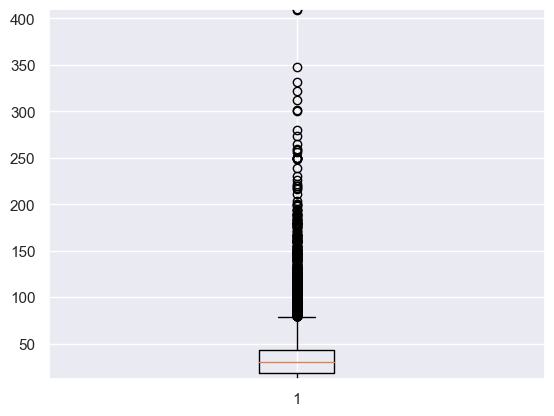

In [446]:
plt.boxplot(data['living_area'])
plt.ylim(12,410)
display(data['living_area'].sort_values(ascending=False).head(10))

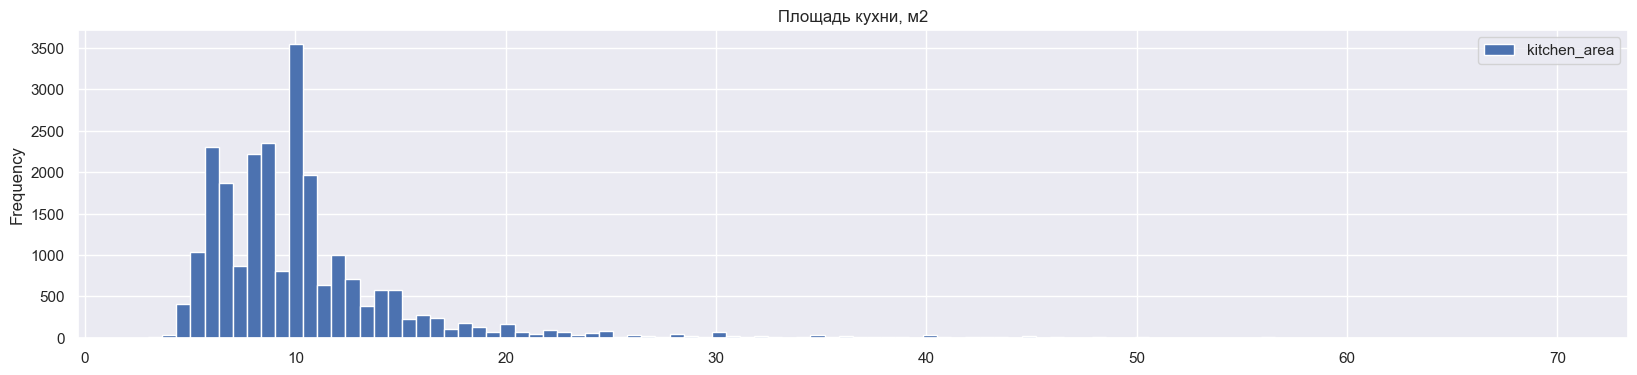

In [447]:
data.plot(kind='hist', title='Площадь кухни, м2', y='kitchen_area', bins=100, range=(3,70), grid=True, figsize=(20,4))
plt.show()

19540    112.0
20215    107.0
2489     100.7
5358     100.0
16239     93.2
16797     93.0
10867     87.2
4394      77.0
492       77.0
14644     75.0
Name: kitchen_area, dtype: float64

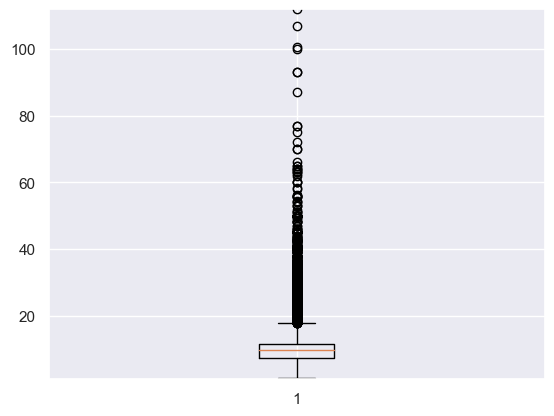

In [448]:
plt.boxplot(data['kitchen_area'])
plt.ylim(1,112)
display(data['kitchen_area'].sort_values(ascending=False).head(10))

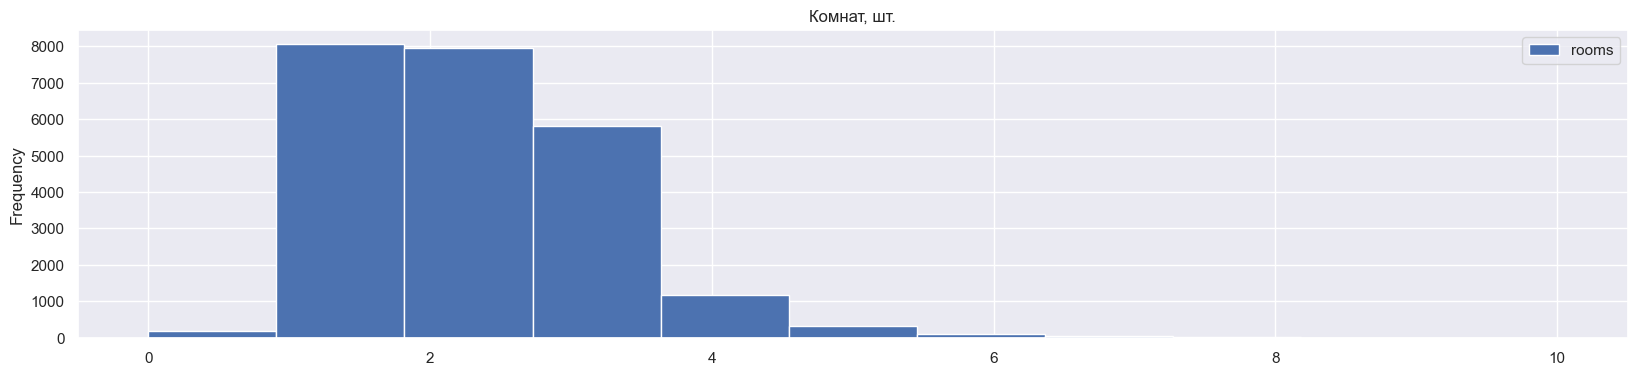

In [449]:
data.plot(kind='hist', title='Комнат, шт.', y='rooms', bins=11, range=(0,10), grid=True, figsize=(20,4))
plt.show()

14498    19
18848    16
5358     15
20829    14
866      14
19540    12
9688     11
648      11
18119    10
4149     10
Name: rooms, dtype: int64

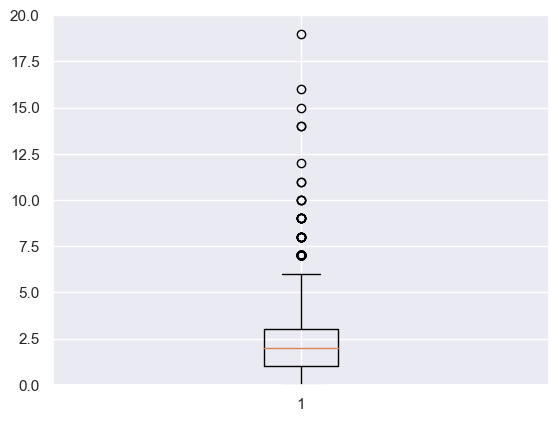

In [450]:
plt.boxplot(data['rooms'])
plt.ylim(0,20)
display(data['rooms'].sort_values(ascending=False).head(10))

In [451]:
# переменные для удаления
data['too_ceiling_height'] = (data['ceiling_height'] < 2.5) | (data['ceiling_height'] > 5)
data['too_price_m2'] = (data['price_m2'] < 10000) | (data['price_m2'] > 250000)
data['too_total_area'] = (data['total_area'] < 16.9) | (data['total_area'] > 500)
data['too_living_area'] = (data['living_area'] < 12) | (data['living_area'] > 251)
data['too_kitchen_area'] = (data['kitchen_area'] < 3) | (data['kitchen_area'] > 70)
data['too_rooms'] = (data['rooms'] > 9)
good_data = data[(data['too_ceiling_height'] == False) & 
     (data['too_price_m2'] == False) &
     (data['too_total_area'] == False) &
     (data['too_living_area'] == False) &
     (data['too_kitchen_area'] == False) &
     (data['too_rooms'] == False)].reset_index(drop=True)
display('Доля отформатированных данных: {:.1%}'. format(len(good_data) / len(data)))

'Доля отформатированных данных: 97.7%'

#### Выводы по блоку

- В целом данные адекватные, можно проводить аналитику  
- Картографические данные, вносимые автоматически, имеют потери более 23%. Часть возможно откорректировать вручную, но требуются техническая доработка автозаполнения  
- Часть данных, добавляемых пользователем (аппарт. или квартира, высота потолков, кол-во балконов), желательно также частично автоматизировать и сделать обязательными. Например, квартиру/апартаменты сделать обязательными к заполнению с выпадающим списком для выбора. Также можно сделать с балконами. Высоту потолков с ограничениями размерности (во избежание путаницы ед.измерения)  
- Для удобства и возможности проведения исследования типы данных откорректированы в параметрах: first_day_exposition (формат даты), last_price, floors_total, цена за м2, price_m2 (формат int)  
- Явных дубликатов не обнаружено, неявные дубликаты в наименованиях населённых пунктов приведены в логическое соответствие  
- Обработаны пропуски в параметрах: is_apartment, parks_nearest, balcony, floors_total, ceiling_height, airports_nearest, km_to_center, kitchen_area, living_area  
- Обработаны аномальные значения по выбросам в параметрах: bad_ceiling_height, bad_price_m2, total_area, living_area, kitchen_area, rooms. Значения выбросов могут быть реальными, но могут искажать средние и медианные показатели. Доля удаленных строк составила **2,3%**.

## Часть 3. Исследовательский анализ данных

### Проведите исследовательский анализ данных

   - Гистограммы для параметров:
        - общая площадь;  *бОльшая часть квартир - объекты площадью до 100м2*     
        - жилая площадь;  *бОльшая часть квартир - объекты жилой площадью до 50м2*  
        - площадь кухни;  *типовые квартиры с небольшой площадью*  
        - цена объекта;   *основной ценовой сегмент до 10 млн, но также имеется весомая доля объявлений с высоким ценником*    
        - количество комнат;  *преимущественно 1-3 комнатные квартиры*  
        - высота потолков;  *данные очищены, основная часть квартир с h потолков до 3м*  
        - этаж квартиры;  *данные очищены, аномалий нет*  
        - тип этажа квартиры («первый», «последний», «другой»);  *данные не отразились, т.к. не являются числовыми*  
        - общее количество этажей в доме;  *данные очищены, аномалий нет*  
        - расстояние до центра города в км;  *основная часть объявлений - городская локация и пригород, 23% пропущено*  
        - расстояние до ближайшего аэропорта;  *нормальное распределение данных, 23% пропущено*  
        - расстояние до ближайшего парка;  *самая большая потеря данных - 65%, выводы неинформативные*  
        - день и месяц публикации объявления;  *основная часть объявлений публикуется в будние дни, самые активные месяцы для публикации - зимние, самый пассивный - май*  

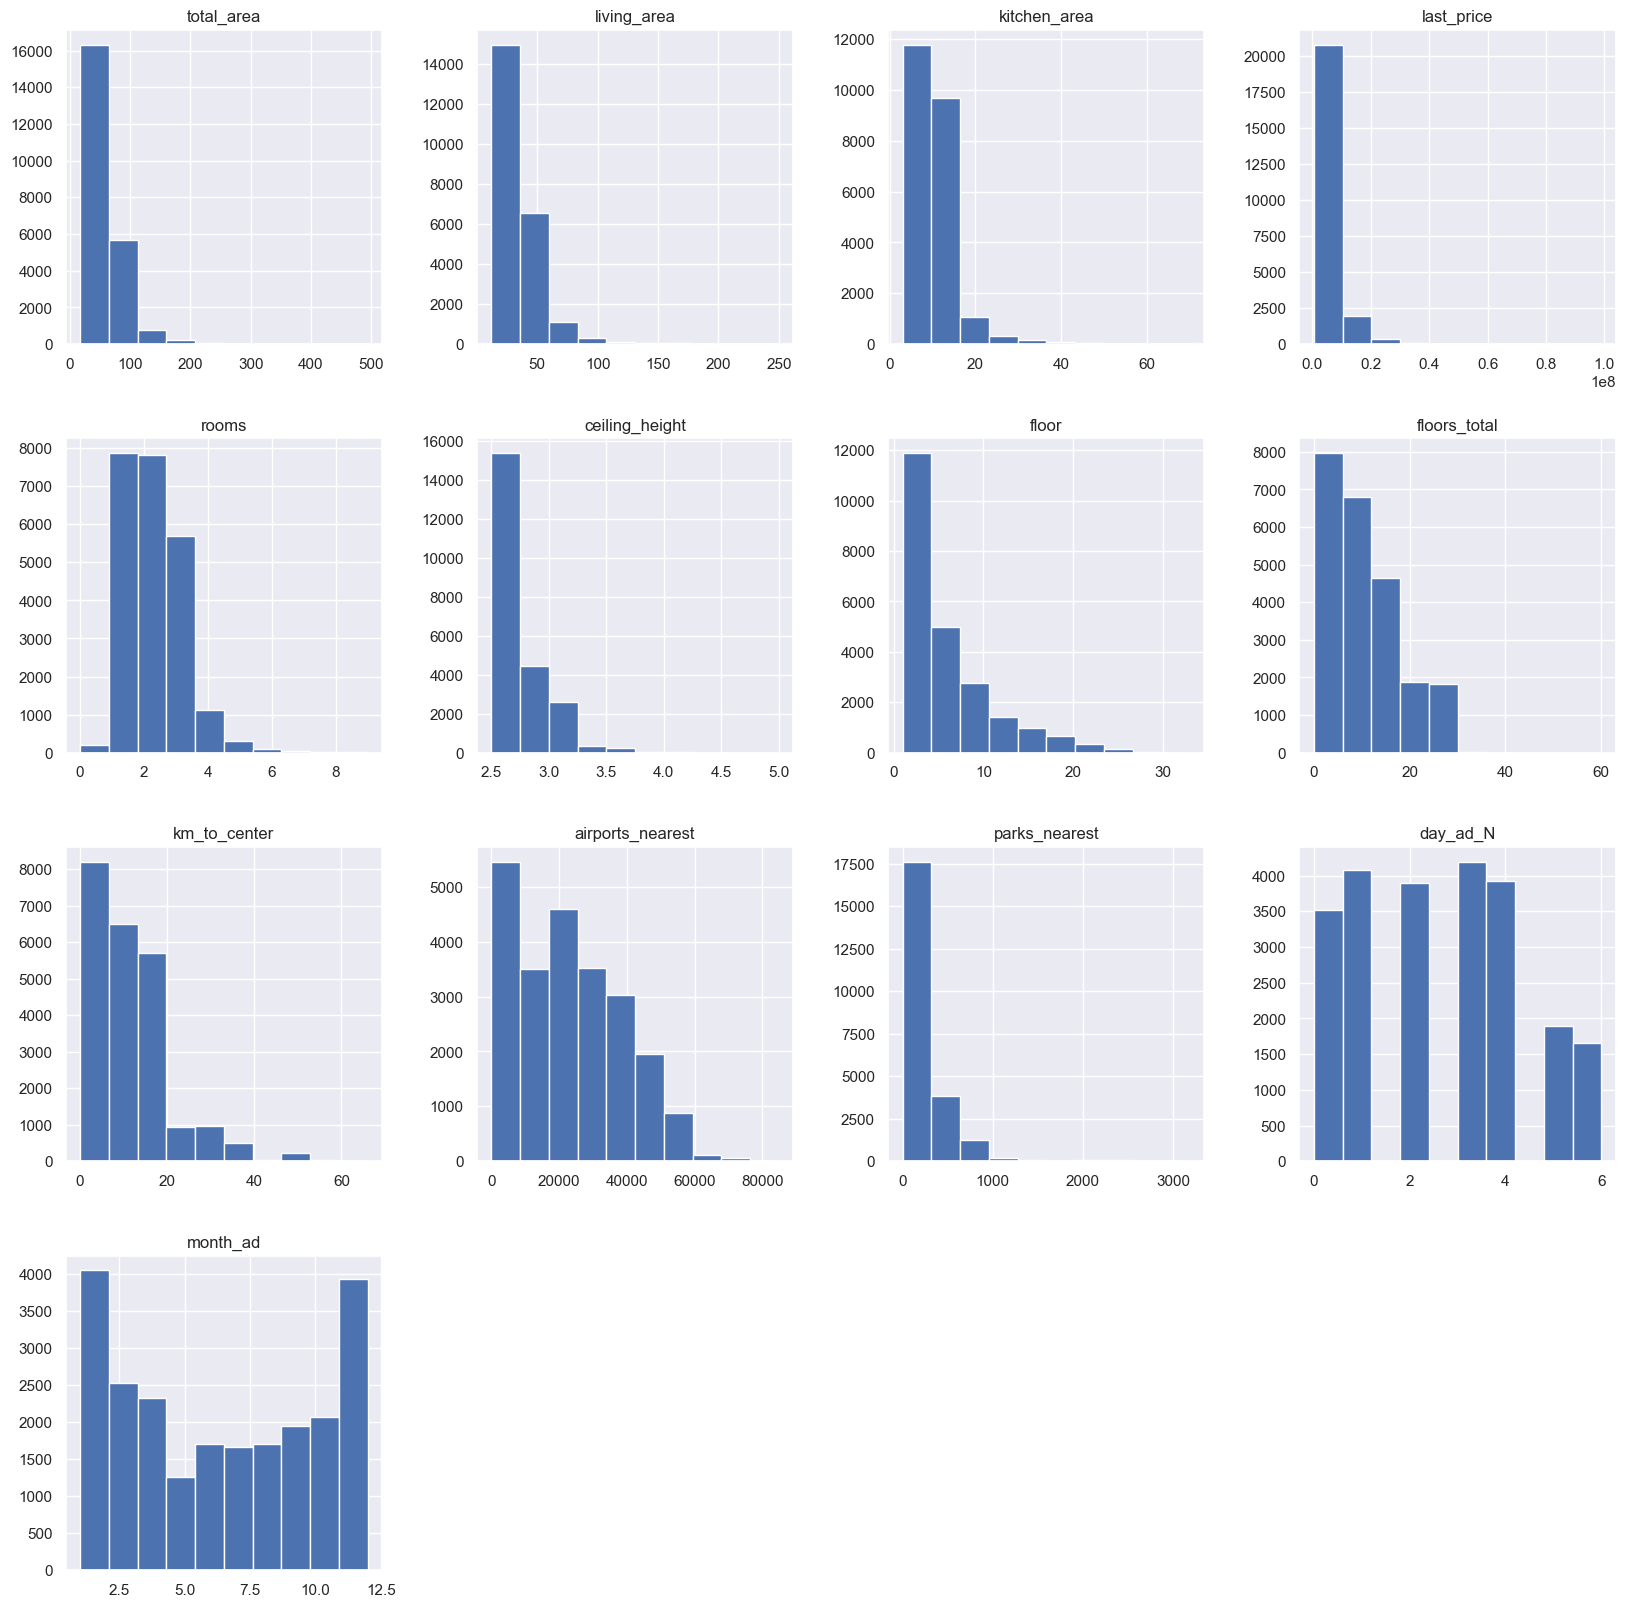

In [452]:
hist_good_data = good_data[['total_area','living_area','kitchen_area','last_price', 'rooms', 'ceiling_height', 'floor'
                           , 'floor_type', 'floors_total', 'km_to_center', 'airports_nearest'
                           , 'parks_nearest', 'day_ad_N', 'month_ad']]

hist_good_data.hist(figsize=(20, 20))
plt.show()

#### Скорость продажи квартир

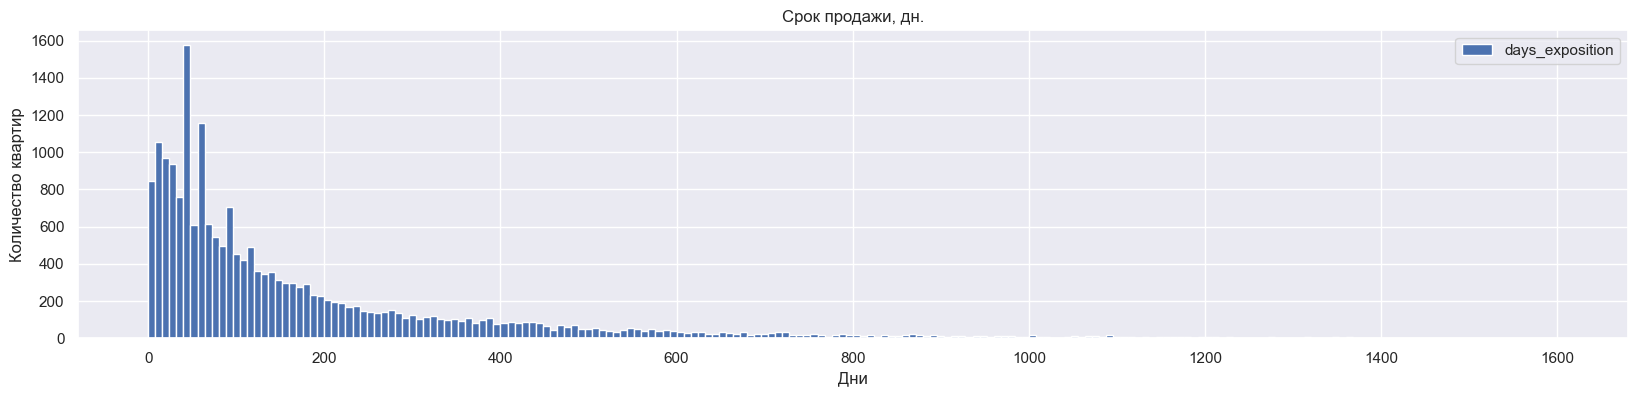

'Среднее количество дней продажи - 181'

'Медиана по дням продажи - 95'

In [453]:
data.plot(kind='hist', y='days_exposition', bins=200, range=(0,1600), grid=True, figsize=(20,4))
plt.title('Срок продажи, дн.')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
display('Среднее количество дней продажи - {0:1.0f}'.format(data['days_exposition'].mean()))
display('Медиана по дням продажи - {0:1.0f}'.format(data['days_exposition'].median()))

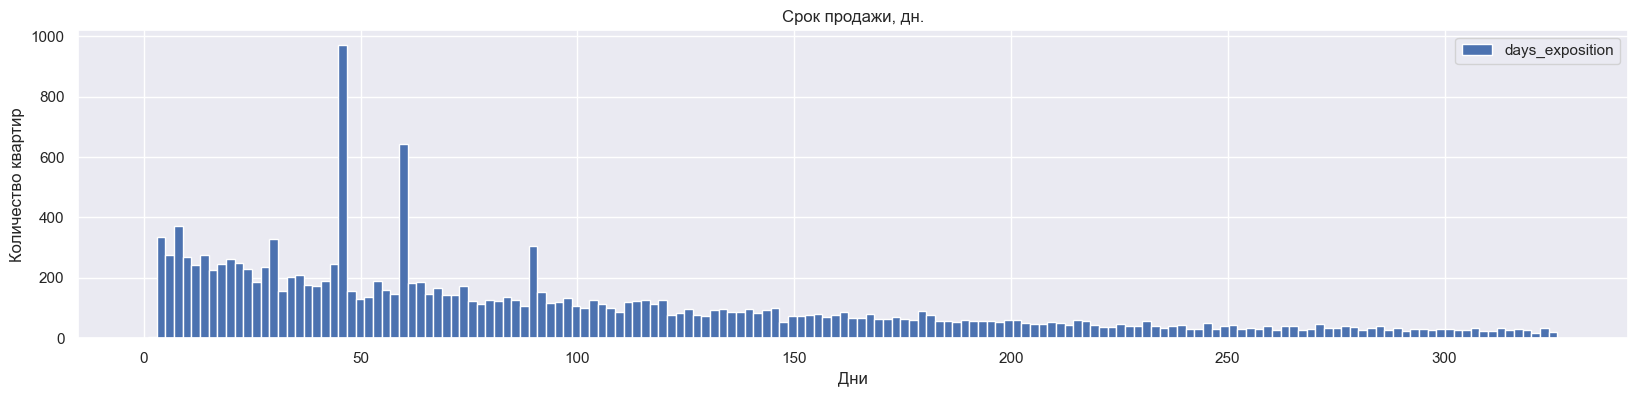

'Среднее количество дней продажи - 98'

'Медиана по дням продажи - 71'

In [454]:
#data_q = q3 + 1.5*(q3-q1) - 1,5 размаха
data_q = 45 + 1.5*(232-45)
data['days_exposition'] = (data['days_exposition']).fillna(0)  # замена пропущенных значений на 0
days_on_sale = data.query('(days_exposition<@data_q) and (days_exposition>0 )')  # срез данных в пределах квартилей

days_on_sale.plot(kind='hist', y='days_exposition', bins=163, range=(1,326), grid=True, figsize=(20,4))
plt.title('Срок продажи, дн.')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
display('Среднее количество дней продажи - {0:1.0f}'.format(days_on_sale['days_exposition'].mean()))
display('Медиана по дням продажи - {0:1.0f}'.format(days_on_sale['days_exposition'].median()))

 **Вывод**  
При выводе данных по дням продаж (объявления с закрытыми сделками) среднее значение = 181, медианное = 95. Такое стандартное отклонение, возможно, связано с "хвостом" продаж либо элитных, либо сильно несоответствующих реальной стоимости, либо неудалённых с сайта, либо несуществующих  объектов (из раздела мошеннических схем). Чтобы увидеть картину, максимально приближенную к реальности, необходимо очистить данные от влияния выбивающихся значений, ограничившись 1,5 квартильным размахом.  
В таком случае среднее количество дней продажи становится равным 98 дням, что очень близко к экспертным оценочным данным, медианное значение  = 71 дню.  
Исходя из имеющегося графика, можно ранжировать скорость продаж квартир:  
**быстрые** - до 45 дней (с учётом пика на гистограмме)   
**средние** - 46 - 98 дней  
**долгие** - более 98 дней, включая   
**аномально долгие**  - всё, что за пределами выброса (>326 дн.)  
Рекомендовано провести отдельное исследование по аномально долгим объявлениям с целью удаления неактивных или сомнительных, предполагающих мошенническую деятельность.


#### Факторы влияния на стоимость 

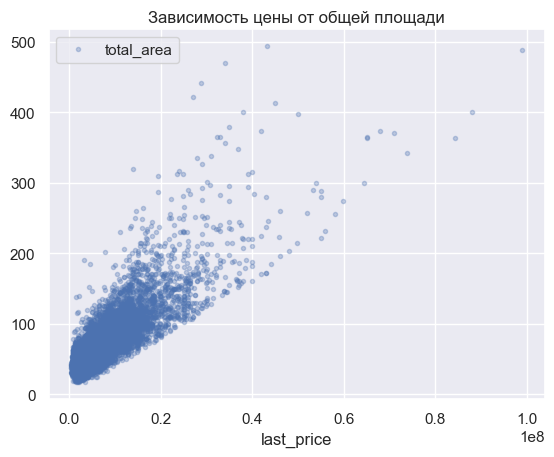

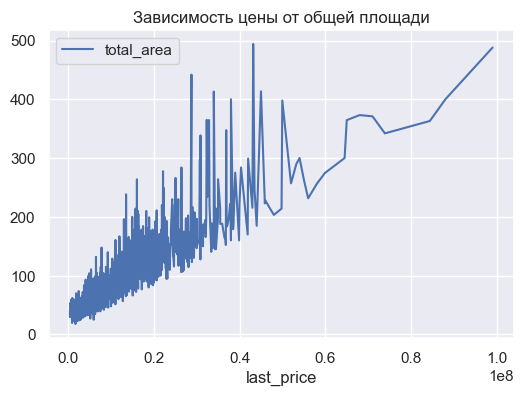

'Коэффициент корреляции цены от общей площади'

0.83

In [455]:
# цена - общая площадь
good_data.plot(x='last_price', y='total_area',\
                  style='.', title='Зависимость цены от общей площади',\
                  alpha=0.3, grid=True, sharex=False)

good_data.pivot_table(index='last_price', values='total_area')\
.plot(style='-',title='Зависимость цены от общей площади', figsize=(6,4))
plt.show()

display('Коэффициент корреляции цены от общей площади', round(good_data['total_area'].corr(good_data['last_price']), 2))

**Взаимосвязь цены от общей площади видна на графиках, это подтверждается и коэффициентом корреляции Пирсона. С увеличением площади увеличивается цена, коэфф-т положительный и стремится к единице. Связь этих параметров сильная, но не абсолютная. Есть объекты с одинаковой площадью, цена которых отличается более чем в 2 раза. Также видно, что чем больше площадь, тем выше амплитуда разброса цен.**

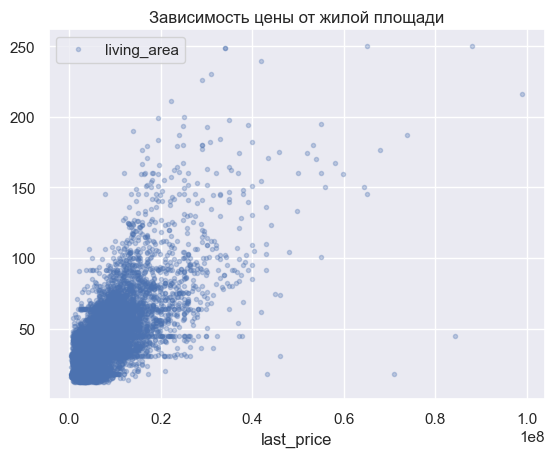

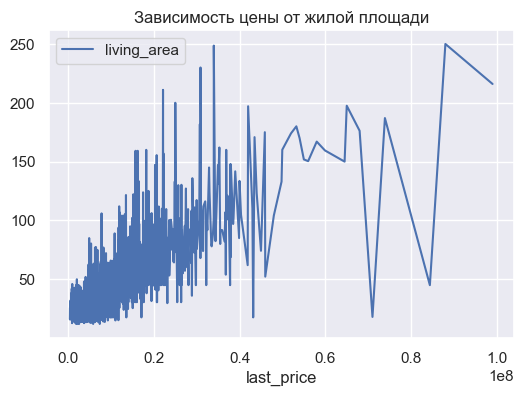

'Коэффициент корреляции цены от жилой площади'

0.71

In [456]:
# цена - жилая площадь
good_data.plot(x='last_price', y='living_area',\
                  style='.', title='Зависимость цены от жилой площади',\
                  alpha=0.3, grid=True, sharex=False)

good_data.pivot_table(index='last_price', values='living_area')\
.plot(style='-',title='Зависимость цены от жилой площади', figsize=(6,4))
plt.show()

display('Коэффициент корреляции цены от жилой площади', round(good_data['living_area'].corr(good_data['last_price']), 2))

**Зависимость менее значительная, чем в примере с жилой площадью, но коэфф-т корреляции убеждает, что она сильная. Разброс цен также увеличивается с увеличением жилой площади.**

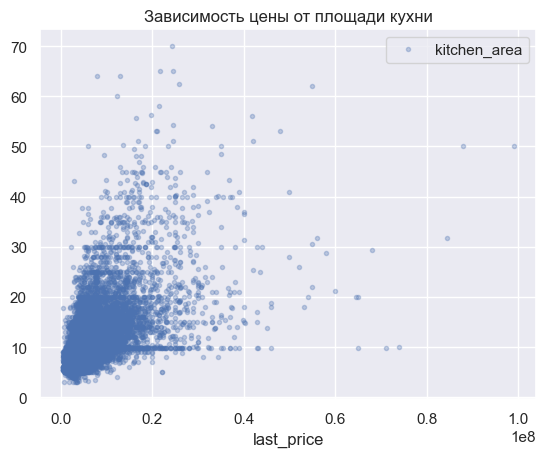

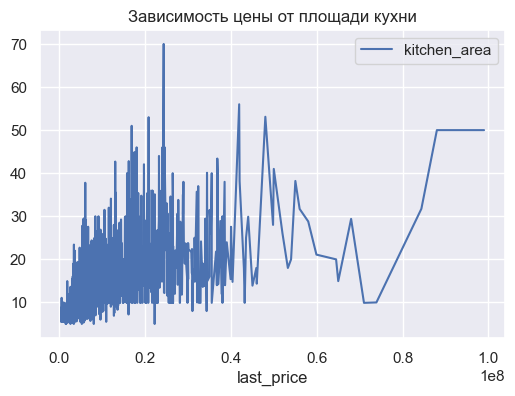

'Коэффициент корреляции цены от площади кухни'

0.58

In [457]:
# цена - площадь кухни
good_data.plot(x='last_price', y='kitchen_area',
                  style='.', title='Зависимость цены от площади кухни',
                  alpha=0.3, grid=True, sharex=False)

good_data.pivot_table(index='last_price', values='kitchen_area')\
.plot(style='-',title='Зависимость цены от площади кухни', figsize=(6,4))
plt.show()

display('Коэффициент корреляции цены от площади кухни', round(good_data['kitchen_area'].corr(good_data['last_price']), 2))

**В данном кейсе зависимость площади кухни и роста цены есть, но она слабая, коэфф-т Пирсона 0,58. Разброс цен гораздо больше в тех объектах, где больше площадь кухни, но это, скорее связано с ростом общей жилой площади подобных объектов.**

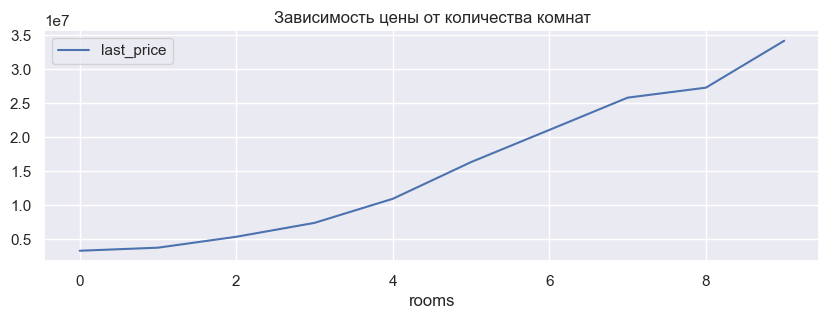

'Коэффициент корреляции цены от кол-ва комнат'

0.54

In [458]:
# цена - количество комнат
good_data.pivot_table(index='rooms',values='last_price').plot(y='last_price',kind='line', grid=True, 
                                                              title='Зависимость цены от количества комнат', figsize=(10, 3))
plt.show()
display('Коэффициент корреляции цены от кол-ва комнат', round(good_data['rooms'].corr(good_data['last_price']), 2))

**Визуально на графике отмечается зависимость цены от количества комнат, но коэфф-т Пирсона даёт основания полагать, что не стоит полагаться на видимый график. Это следствие зависимости количества комнат и общей площади объекта.**

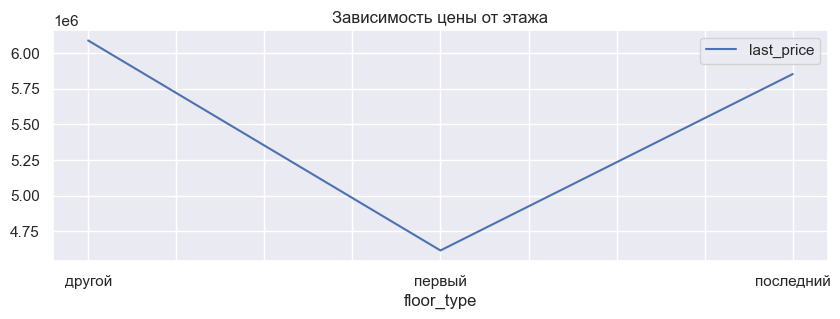

'Коэффициент корреляции цены от этажа'

0.07

In [459]:
# цена - этаж квартиры
good_data.pivot_table(index='floor_type',values='last_price').plot(y='last_price',kind='line', grid=True, 
                                                              title='Зависимость цены от этажа', figsize=(10, 3))
plt.show()
display('Коэффициент корреляции цены от этажа', round(good_data['floor'].corr(good_data['last_price']), 2))

**Нельзя рассматривать этажность отдельно, как веский фактор цены, не ранжировав по величине объекта (общ.площадь, жилая, кол-во комнат). Что подтверждает и коэфф-т Пирсона, стремящийся к 0. Но провал первого этажа на графике даёт основания полагать, что это самый непопулярный для спроса параметр, соответственно дисконтирование для первых этажей весомое.**

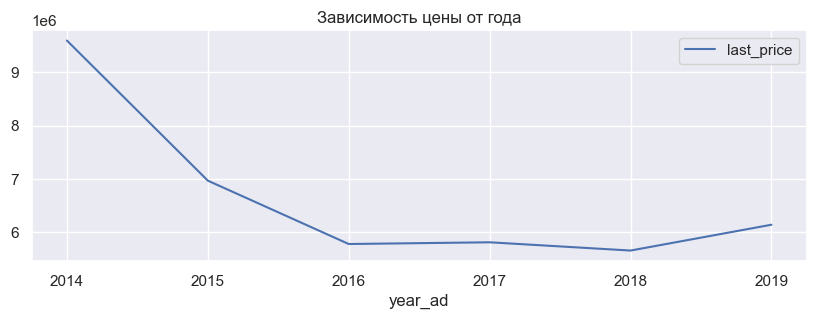

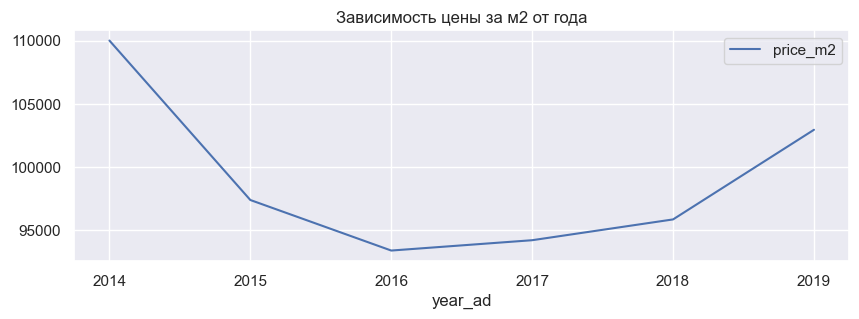

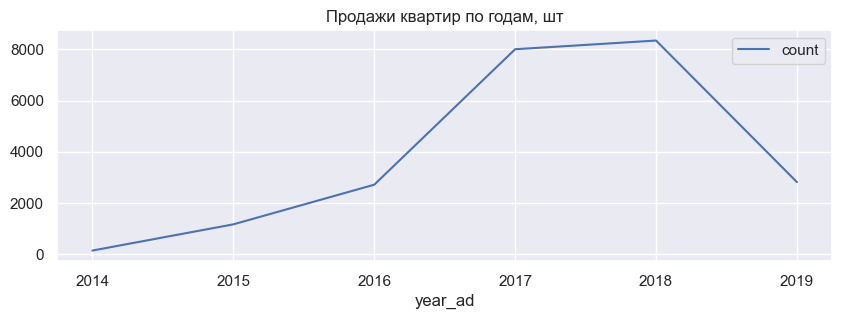

,count
year_ad,
2014,128
2015,1153
2016,2705
2017,8007
2018,8347
2019,2806


In [460]:
# количество проданных квартир по годам
count_sale_city = good_data.pivot_table(index = 'year_ad', values = 'last_price', aggfunc = ['count'])
count_sale_city.columns = ['count']

# цена - год
good_data.pivot_table(index='year_ad',values='last_price').plot(y='last_price',kind='line', grid=True, 
                                                              title='Зависимость цены от года', figsize=(10, 3))
good_data.pivot_table(index='year_ad',values='price_m2').plot(y='price_m2',kind='line', grid=True, 
                                                              title='Зависимость цены за м2 от года', figsize=(10, 3))
count_sale_city.pivot_table(index='year_ad',values='count').plot(y='count',kind='line', grid=True, 
                                                              title='Продажи квартир по годам, шт', figsize=(10, 3))
plt.show()

display(count_sale_city)
#display('Коэффициент корреляции цены от года', round(good_data['year_ad'].corr(good_data['last_price']), 2))

***Не стоит связывать год с трендом цены. Цена в каждый конкретный год зависит от внешних факторов, которые в данном анализе не фигурируют. Пик продаж 2017 - 2018гг.   
    По графикам обнаруживается следующая особенность: на пике низких цен валовые продажи в количестве объектов были максимальными (более 8 000 квартир в год). При резком увеличении цены за м2 в 2019 г. упал показатель количества продаваемых объектов.***

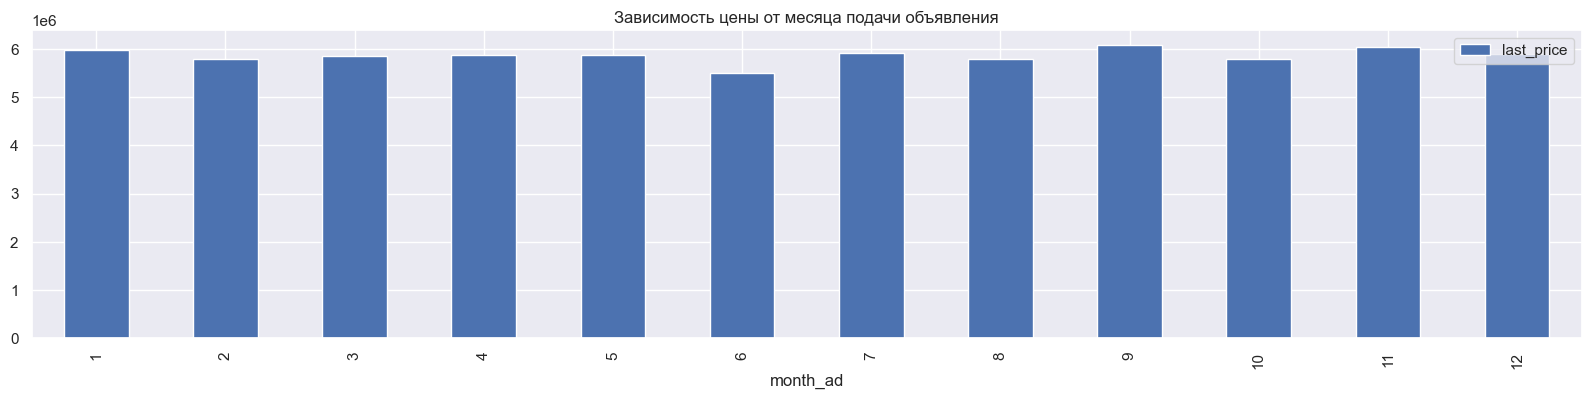

'Коэффициент корреляции цены от месяца подачи объявления'

0.01

In [461]:
# цена - месяц
good_data.pivot_table(index='month_ad',values='last_price').plot(y='last_price',kind='bar', grid=True, 
                                                              title='Зависимость цены от месяца подачи объявления', 
                                                                figsize=(20, 4))
plt.show()
display('Коэффициент корреляции цены от месяца подачи объявления', round(good_data['month_ad'].corr(good_data['last_price']), 2))

**Месяц подачи объявления практически не влияет на ценовой фактор. Не стоит рассматривать данный параметр, как важный для анализа.**

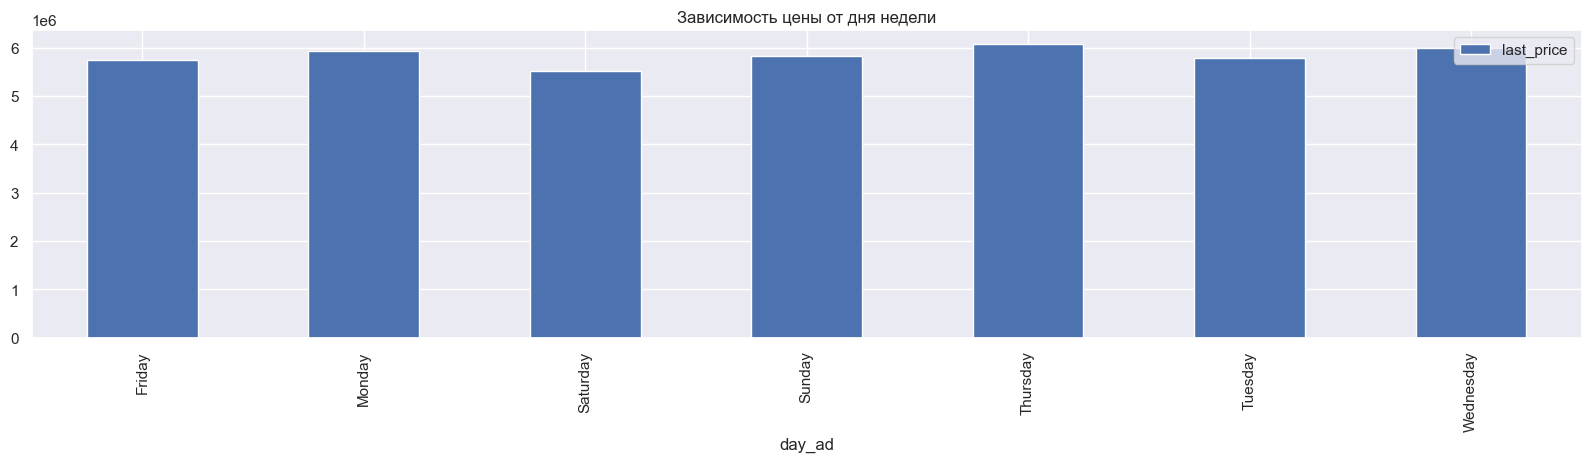

'Коэффициент корреляции цены от дня недели'

-0.01

In [462]:
# цена - день недели
good_data.pivot_table(index='day_ad',values='last_price').plot(y='last_price',kind='bar', grid=True, 
                                                              title='Зависимость цены от дня недели', 
                                                                figsize=(20, 4))
plt.show()
display('Коэффициент корреляции цены от дня недели', round(good_data['day_ad_N'].corr(good_data['last_price']), 2))

**День недели подачи объявления не влияет на ценовой фактор. Не стоит рассматривать данный параметр, как важный для анализа.**

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [463]:
good_data.pivot_table(index='locality_name', values='price_m2', aggfunc=['count', 'mean', 'median'])\
.sort_values(('count', 'price_m2'), ascending=False)\
.head(10).sort_values(('mean', 'price_m2'), ascending=False)

,count,mean,median
,price_m2,price_m2,price_m2
locality_name,,,
Санкт-Петербург,15277,109993.880539,104150.0
Пушкин,363,102677.911846,99744.0
деревня Кудрово,297,92470.976431,91860.0
поселок Парголово,318,89959.336478,91472.0
поселок Мурино,546,85474.236264,85714.0
поселок Шушары,432,78391.701389,76625.0
Колпино,337,75443.545994,74725.0
Гатчина,306,68757.225490,67860.0


In [464]:
good_data.pivot_table(index='locality_name', values='price_m2', aggfunc=['count', 'mean', 'median'])\
.sort_values(('count', 'price_m2'), ascending=False)\
.tail(1).sort_values(('mean', 'price_m2'), ascending=False)

,count,mean,median
,price_m2,price_m2,price_m2
locality_name,,,
село Шум,1,33898.0,33898.0


**Лидерство по цене за г.Санкт-Петербург и очень близок к нему г.Пушкин. Замыкает 10-ку городов Выборг, при этом средняя цена за м2 уже ниже практически в 2 раза.  
Для сравнения самое дешёвое жилье в Ленинградской области в селе Шум, представлено 1 объектом.**

#### Стоимость объектов и удалённость от центра города.

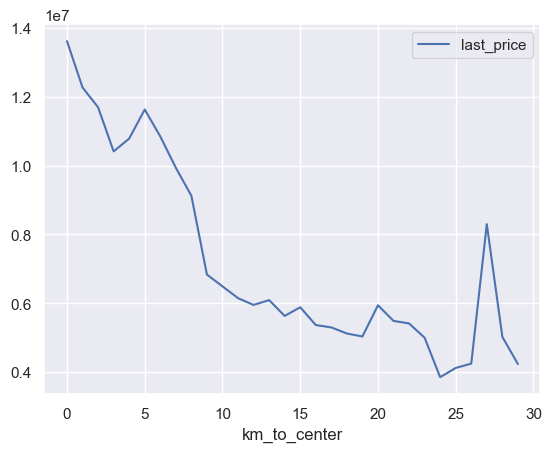

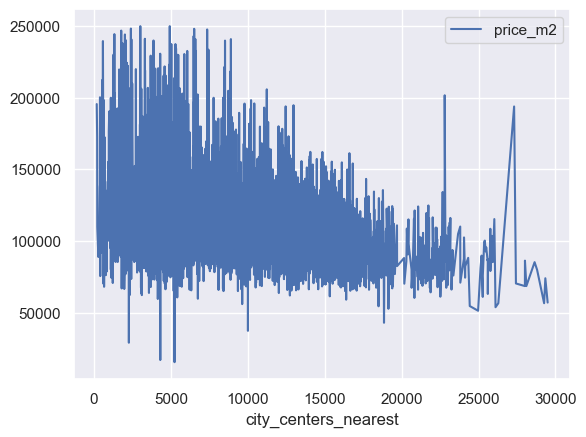

'Коэффициент корреляции цены от удалённости от центра, км'

-0.02

In [465]:
good_data[good_data['locality_name']=='Санкт-Петербург'].pivot_table(index='km_to_center',values='last_price',
                                                                     aggfunc='mean').plot(kind='line')
good_data[good_data['locality_name']=='Санкт-Петербург'].pivot_table(index='city_centers_nearest',values='price_m2',
                                                                     aggfunc='mean').plot(kind='line')
plt.show()
display('Коэффициент корреляции цены от удалённости от центра, км', 
        round(good_data['last_price'].corr(good_data['km_to_center']), 2))

In [466]:
#средняя цена каждого километра
city_centers = good_data[good_data['locality_name']=='Санкт-Петербург']
km_to_city_centers = pd.pivot_table(city_centers, index='km_to_center', values='last_price', aggfunc=['median', 'count'])
km_to_city_centers.columns = ['median', 'count']
km_to_city_centers['fraction,%'] = km_to_city_centers['count']/ km_to_city_centers['count'].sum() *100
display(km_to_city_centers)

,median,count,"fraction,%"
km_to_center,,,
0.0,11500000,17,0.111278
1.0,10100000,165,1.080055
2.0,9500000,277,1.813183
3.0,8350000,339,2.219022
4.0,8990000,651,4.261308
5.0,9090000,858,5.616286
6.0,8342500,558,3.652550
7.0,7000000,364,2.382667
8.0,7400000,582,3.809648


**Самые высокие ценовые предложения в пределах 7 км от центра. На графике отражено, как с удаленностью цена меняется в меньшую сторону. При этом коэфф-т корреляции близок к нулю. Искажение коэфф-та(предполагаю) из-за огромного разброса цен, который наблюдается в ближайших к центру объектах, а также большая часть объектов (количественно) за пределами центра.**

### Общий вывод

  - На основании данных сервиса недвижимости проведено исследование о продаже квартир в Ленинградской области (319 нас.пунктов), включая г.Санкт-Петербург, за период с 2014 по 2019 гг.  
   - В результате предобработки потеря данных составила 2,3% (очистка от выбросов, аномальных значений, NaN). Рекомендованы технические доработки при работе с сайтом для устранения пропусков и аномалий.  
   - **Портрет самой продаваемой жилплощади:** типовая 1-3 комнатная квартира площадью до 50 - 100 м2 в доме этажностью до 15 (преимущественно советской постройки) в г. Санкт-Петербурге в пределах удалённости от центра 10-17км (более 60% предложений) ценой до 10 млн руб. Внутри: h потолков до 3м, жилая площадь 50 - 25 м2, кухня до 14м2. 
   - Наилучшим годом по цене за м2 был 2016, далее устойчивый тренд на повышение стоимости м2, который очень ускорился в 2019 году.
   - Наилучшие продажи рассматриваемого периода были в 2017-2018гг. БОльшая часть квартир реализуется за 98 дней, больше половины из них успевает уложиться в срок до 45 дней. Но существуют объекты продающиеся от полугода до нескольких лет. Эти лоты необходимо проверить на актуальность, а также это могут быть пользователи с завышенными ценовыми ожиданиями.  
   - Если детально изучить факторы влияния на текущее ценовое предложение объекта, то основными драйверами являются: локация (центр, город, как субъект), размер общей площади, площадь жилого помещения и кухни, а также количество комнат.  
Очевидное дисконтирование связано с первым этажом, удаленность от административных центров (сёла, деревни).  
Нет никакого влияния на цену, напрямую связанного с днём недели, месяцем, годом размещения объявления, а также этажом(кроме первого).
   - По стоимости квадратного метра лидируют города, на первом месте Санкт-Петербург, особенно центральный район (что логично). В исследовании представлен ТОП-10 городов с самой высокой стоимостью квадратного метра.  
   - Самое большое количество объявлений в спальных районах санкт-Петербурга (10-17 км от центра города).  
   - В пределах городских локаций наблюдается очень большой разброс цен, особенно если это обусловлено близостью к центру С-Пб.

